## Это 4 лаба по питону.

In [87]:
import cv2
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

1-2. Формируем DataFrame:

In [3]:
df = pd.read_csv('dataset.csv', sep = ' ')

3. Формируем столбец-метку:

In [4]:
list1 = [0 for item in df.Class if item == 'polarbears'] 
list2 = [1 for item in df.Class if item == 'brownbears'] 
res = list1 + list2
df['Mark'] = res

4. Добавляем три новых столбца: 

In [5]:
height = []
width = []
depth = []

for image in df.Absolute_way:
    img = cv2.imread(image)
    heig, wid, dep = img.shape
    height.append(heig)
    width.append(wid)
    depth.append(dep)
    
df['Height'] = height
df['Width'] =  width
df['Depth'] = depth


5. Вычисление статистической информации

In [6]:
df.describe()

,Mark,Height,Width,Depth
count,2100.000000,2100.000000,2100.000000,2100.0
mean,0.500000,310.786667,442.373333,3.0
std,0.500119,17.058574,72.636549,0.0
min,0.000000,219.000000,148.000000,3.0
25%,0.000000,304.000000,427.000000,3.0
50%,0.500000,320.000000,480.000000,3.0
75%,1.000000,320.000000,480.000000,3.0
max,1.000000,320.000000,480.000000,3.0


6. Фильтрация по метке:

In [7]:
def filter_by_mark(df: pd.core.frame.DataFrame, mark: int) -> pd.core.frame.DataFrame:
    '''
    Создание нового датафрейма, отфильтрованного по метке
    Ключевые аргуметы:
        df(pd.core.frame.DataFrame): исходный датафрейм
        mark(int): метка
    '''
    return df[df.Mark == mark]

filtered_df = filter_by_mark(df, 1)

7. Фильтрация по метке и размерам:

In [8]:
def filter_by_shape(df: pd.core.frame.DataFrame, mark: int, max_height: int, max_width: int) -> pd.core.frame.DataFrame:
    '''
    Создаёт новый датафрейм, отфильтрованный по метке и размерам
    Ключевые аргументы:
        df(pd.core.frame.DataFrame): исходный датафрейм
        mark(int): метка
        max_height(int): максимальный предел фильтрации по высоте
        max_width(int): максимальный предел фильтрации по ширине
    '''
    return df[(df.Mark == mark) & (df.Height <= max_height) & (df.Width <= max_width)]

filtered_df2 = filter_by_shape(df, 1, 320, 450)
filtered_df2.tail(10)

,Absolute_way,Class,Mark,Height,Width,Depth
2069,E:\dataset/brownbears/1019.jpg,brownbears,1,320,180,3
2073,E:\dataset/brownbears/1023.jpg,brownbears,1,320,320,3
2074,E:\dataset/brownbears/1024.jpg,brownbears,1,320,427,3
2078,E:\dataset/brownbears/1028.jpg,brownbears,1,320,213,3
2082,E:\dataset/brownbears/1032.jpg,brownbears,1,320,251,3
2083,E:\dataset/brownbears/1033.jpg,brownbears,1,320,180,3
2084,E:\dataset/brownbears/1034.jpg,brownbears,1,320,427,3
2087,E:\dataset/brownbears/1037.jpg,brownbears,1,320,213,3
2094,E:\dataset/brownbears/1044.jpg,brownbears,1,320,370,3
2097,E:\dataset/brownbears/1047.jpg,brownbears,1,320,446,3


8. Группировка датафрейма:

In [100]:
df['Size'] = df['Height'] * df['Width']
def grouping_df(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    '''
    Группировка датафрейма по метке класса с вычислением максимального, минимального и среднего значения по количеству пикселей
    Ключевые аргументы:
        df(pd.core.frame.DataFrame): исходный датафрейм 
    '''
    rdf = df.loc[:, ['Mark', 'Size']]
    res_df = rdf.groupby('Mark').count()
    res_df['Min_Size'] = rdf['Size'].min()
    res_df['Min_Size'][0] = rdf[rdf.Mark == 0]['Size'].min()
    res_df['Min_Size'][1] = rdf[rdf.Mark == 1]['Size'].min()
    res_df['Average_Size'] = rdf['Size'].mean()
    res_df['Average_Size'][0] = rdf[rdf.Mark == 0]['Size'].mean()
    res_df['Average_Size'][1] = rdf[rdf.Mark == 1]['Size'].mean()
    res_df['Max_Size'] = rdf['Size'].max()
    res_df['Max_Size'][0] = rdf[rdf.Mark == 0]['Size'].max()
    res_df['Max_Size'][1] = rdf[rdf.Mark == 1]['Size'].max()
    res_df.drop(['Size'], axis=1, inplace=True)
    return res_df

gr_df = grouping_df(df) 
gr_df.head()


,Min_Size,Average_Size,Max_Size
Mark,,,
0,47360,137399.619048,153600
1,51200,136874.514286,153600


9. Построение гистограммы:

In [126]:
def hist(df: pd.core.frame.DataFrame, mark: int) -> np.ndarray[int, np.dtype[np.generic]]:
    '''
    Строит гистограмму для случайного изображения из датафрейма с меткой mark
    Ключевые агрументы:
        df(pd.core.frame.DataFrame): исходный датафрейм
        mark(int): метка класса
    '''
    random_numbers = list(range(0, 1050))
    random.shuffle(random_numbers)
    num = random.choice(random_numbers)
    n_df = df[df.Mark == mark]['Absolute_way']
    img_path = n_df.iloc[num]
    image = cv2.imread(img_path)
    blue = []
    green = []
    red = []
    colors = (blue, green, red)
    for i in range(len(colors)):
        histg = cv2.calcHist([image], [i], None, [256], [0,256])
        if (i == 0): 
            blue = histg
        if (i == 1): 
            green = histg
        if (i == 2): 
            red = histg
    return blue, green, red

bl, gr, rd = hist(df, 1)

10. Отображение гистограммы:

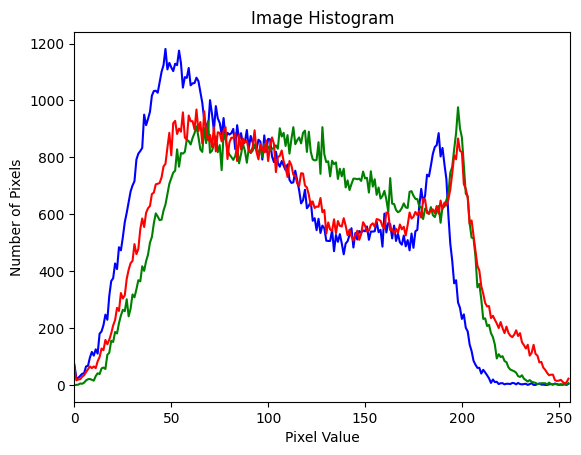

In [132]:
colors = {'b': bl, 'g': gr, 'r': rd}
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    plt.plot(colors[col], color=col)
    plt.xlim([0,256])
plt.title('Image Histogram')
plt.ylabel('Number of Pixels')
plt.xlabel('Pixel Value')
plt.show()
